In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import os
import pynterpred as pnt

/home/diego/Myusr/opt/miniconda3/envs/UIBCDFLab_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/diego/Myusr/opt/miniconda3/envs/UIBCDFLab_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/diego/Myusr/opt/miniconda3/envs/UIBCDFLab_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/diego/Myusr/opt/miniconda3/envs/UIBCDFLab_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
pnt.utils.test_systems_path

'/home/diego/Myusr/src/UIBCDFGitHub/LabTools/Pynterpred/examples/testsystems'

In [5]:
pdb_file = os.path.join(pnt.utils.test_systems_path,'Barnase-Barstar/pdbs/Barnase.pdb')
Receptor = pnt.Receptor(pdb_file,'amber14-all.xml',pH=7.0)

Ligand_pdb_file = os.path.join(pnt.utils.test_systems_path,'Barnase-Barstar/pdbs/Barstar.pdb')
Ligand = pnt.Ligand(pdb_file,'amber14-all.xml',pH=7.0)

In [6]:
Region = pnt.Region()

In [7]:
Receptor.center()

In [8]:
Receptor.get_view()

NGLWidget()

In [10]:
Region.centers_in_layer("regular_cartesian",Receptor,Ligand,delta_x=0.25)

In [11]:
Region.centers

array([[-2.75, -0.25, -4.25],
       [-2.75,  0.25, -4.25],
       [-2.75,  0.  , -4.25],
       ...,
       [ 1.75, -0.25, -0.75],
       [ 0.25,  1.75, -0.75],
       [-0.25,  1.75, -0.5 ]])

In [12]:
Region.num_centers

18983

In [14]:
import mdtraj
import nglview
import numpy as np

topol=mdtraj.Topology.from_openmm(Receptor.topology)
chain=topol.add_chain()
residue=topol.add_residue('XXX',chain)
for ii in range(Region.num_centers):
    atom=topol.add_atom('C',mdtraj.element.Element,residue)
    atom.element.symbol='C'
    atom.element.radius=0.5

posit = np.vstack((Receptor.positions._value,Region.centers))

aux_traj=mdtraj.Trajectory(posit, topol)

view=nglview.show_mdtraj(aux_traj)
view.clear()
view.add_cartoon('protein',color='purple')
view.add_surface('protein',color='orange',opacity=0.1)
view.add_ball_and_stick('XXX')
view

NGLWidget()

In [15]:
Region.rotations_in_quaternions_region(nside=8)

In [16]:
Region.rotations

array([quaternion(0.922675780166181, -0.0195287321314864, 0.0471465299677857, 0.382184821818009),
       quaternion(0.382184821818009, -0.0471465299677857, 0.0195287321314864, 0.922675780166181),
       quaternion(-0.382184821818008, -0.0471465299677857, -0.0195287321314864, 0.922675780166181),
       quaternion(-0.922675780166181, -0.0195287321314864, -0.0471465299677857, 0.382184821818009),
       quaternion(0.975663651243166, -0.0199113226122822, 0.100100978509185, 0.194071566635059),
       quaternion(0.827127704754417, -0.0567026494657157, 0.0848615119487913, 0.552669063148122),
       quaternion(0.552669063148122, -0.0848615119487913, 0.0567026494657157, 0.827127704754417),
       quaternion(0.194071566635059, -0.100100978509185, 0.0199113226122822, 0.975663651243166),
       quaternion(-0.194071566635059, -0.100100978509185, -0.0199113226122822, 0.975663651243166),
       quaternion(-0.552669063148122, -0.0848615119487914, -0.0567026494657157, 0.827127704754417),
       quaterni

In [17]:
Region.num_rotations

768

<IPython.core.display.Javascript object>


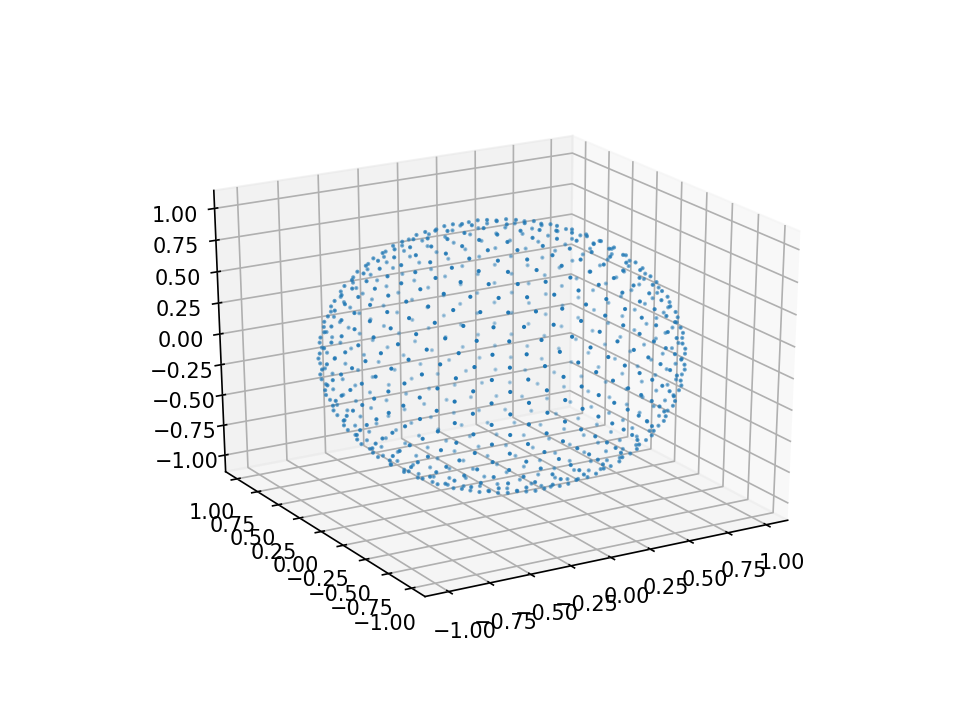

In [20]:
import quaternion
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

vectores_rot=quaternion.rotate_vectors(Region.rotations,(0.0,0.0,1.0))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectores_rot[:,0],vectores_rot[:,1],vectores_rot[:,2],s=1.0)

In [21]:
print(Region.num_centers*Region.num_rotations)

14578944
